<a href="https://colab.research.google.com/github/aRUsh-codes/LGMVIP-Data-Science-Task-3/blob/main/DecisionTreeAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Algorithm using Iris Dataset**
## Creating Decision Tree and visualising it.

### **Loading Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Exploration**

In [3]:
df=pd.read_csv("/content/Iris.csv")

In [4]:
df.shape

(150, 6)

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
count=df['Species'].value_counts()
count.to_frame()

,Species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


### **Data Visualization**

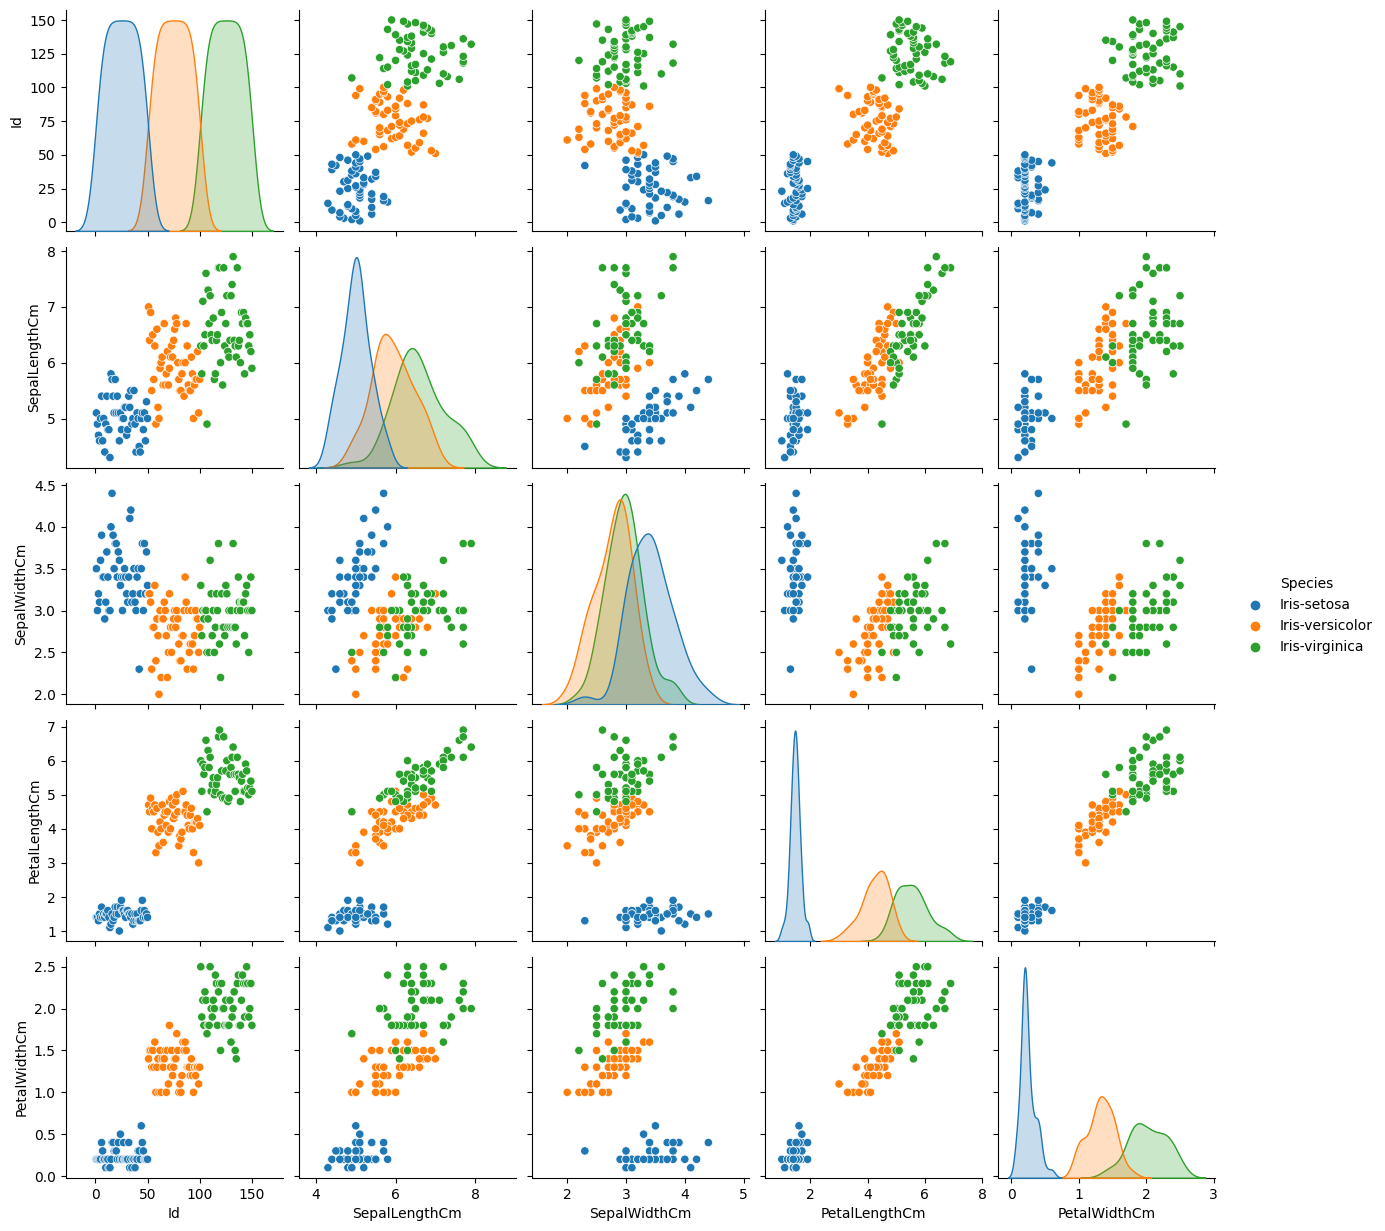

In [9]:
sns.pairplot(data=df,hue="Species")
plt.show()

### **Model Preprocessing**

In [10]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
y=df['Species']
x=df.drop(['Species'],axis=1)

In [12]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [13]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **Model Evaluation**

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [20]:
from sklearn.tree import DecisionTreeClassifier

#### Decison Tree with no specifications

In [21]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
p=dtc.predict(x_test)

In [23]:
p

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'],
      dtype=object)

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
cm=confusion_matrix(y_test,p)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [26]:
l=df['Species'].unique().tolist()
m=pd.DataFrame(data=cm,index=l,columns=l)
m

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,13,0,0
Iris-versicolor,0,15,1
Iris-virginica,0,0,9


In [29]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [31]:
column=df.columns.tolist()
column

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

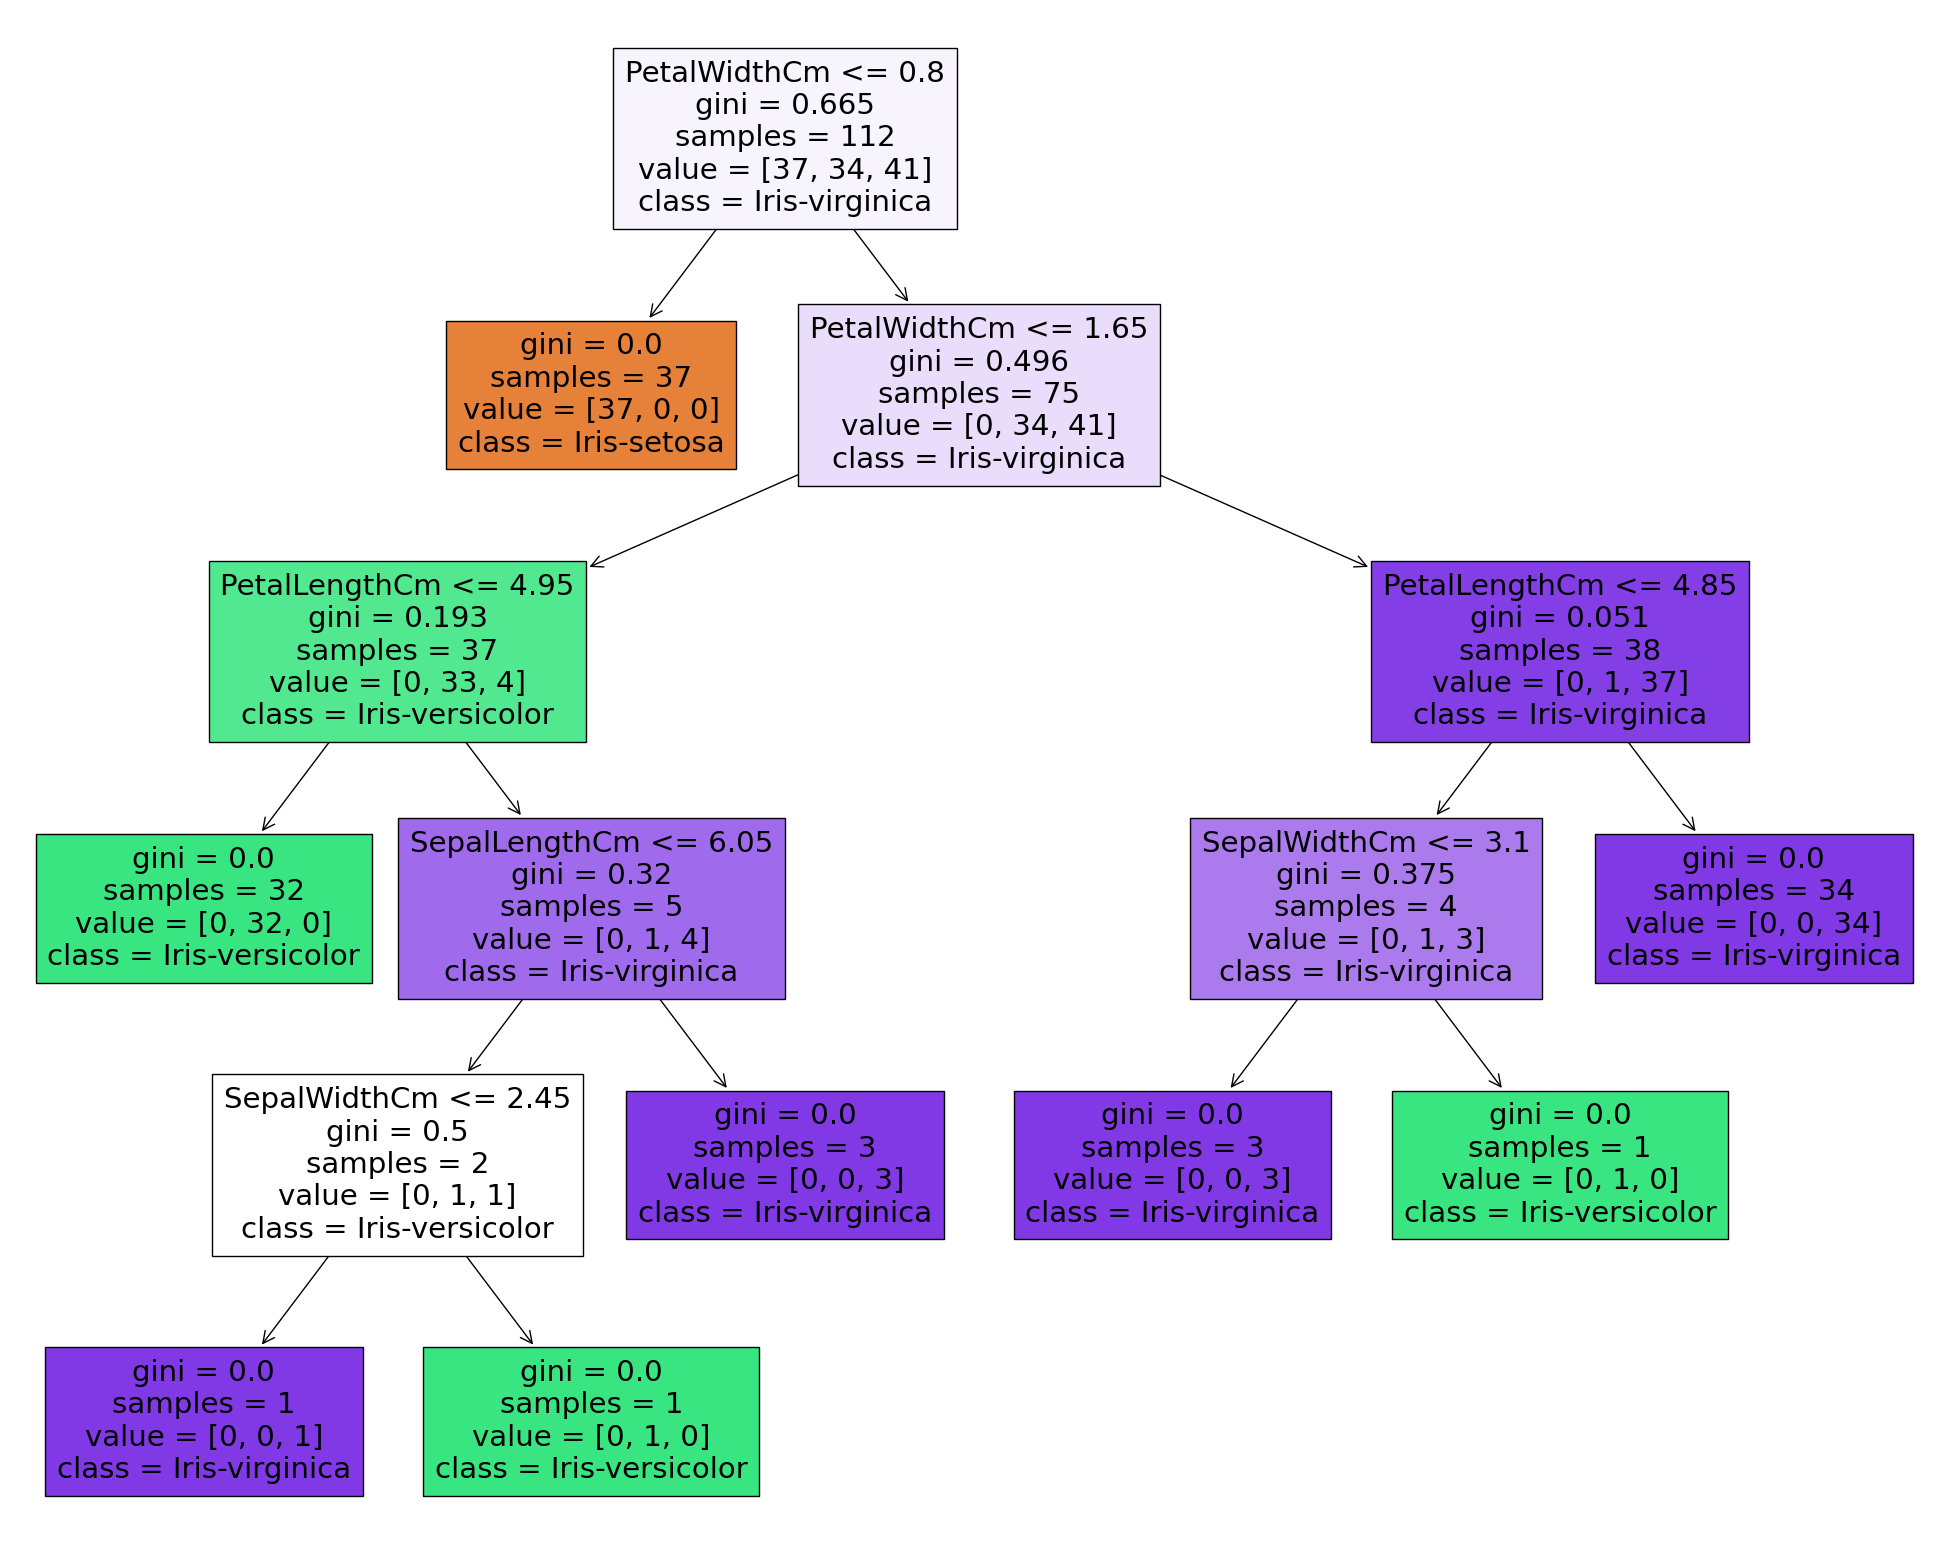

In [34]:
fig=plt.figure(figsize=(25,20))
tree=plot_tree(dtc,feature_names=column,class_names=l,filled=True)


> The colours represent the majority class (and therefore the predicted class) in each node. Thus, the plot_tree() function is using orange to represent the first class, green to represent the second class, and purple to represent the third class.

> Also note that transparency is used to communicate the impurity of each node.





#### Decision Tree with criterion as gini and max_depth as 4

In [35]:
dec=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)
dec.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [39]:
pred=dec.predict(x_test)
cm2=confusion_matrix(y_test,pred)
cm2

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

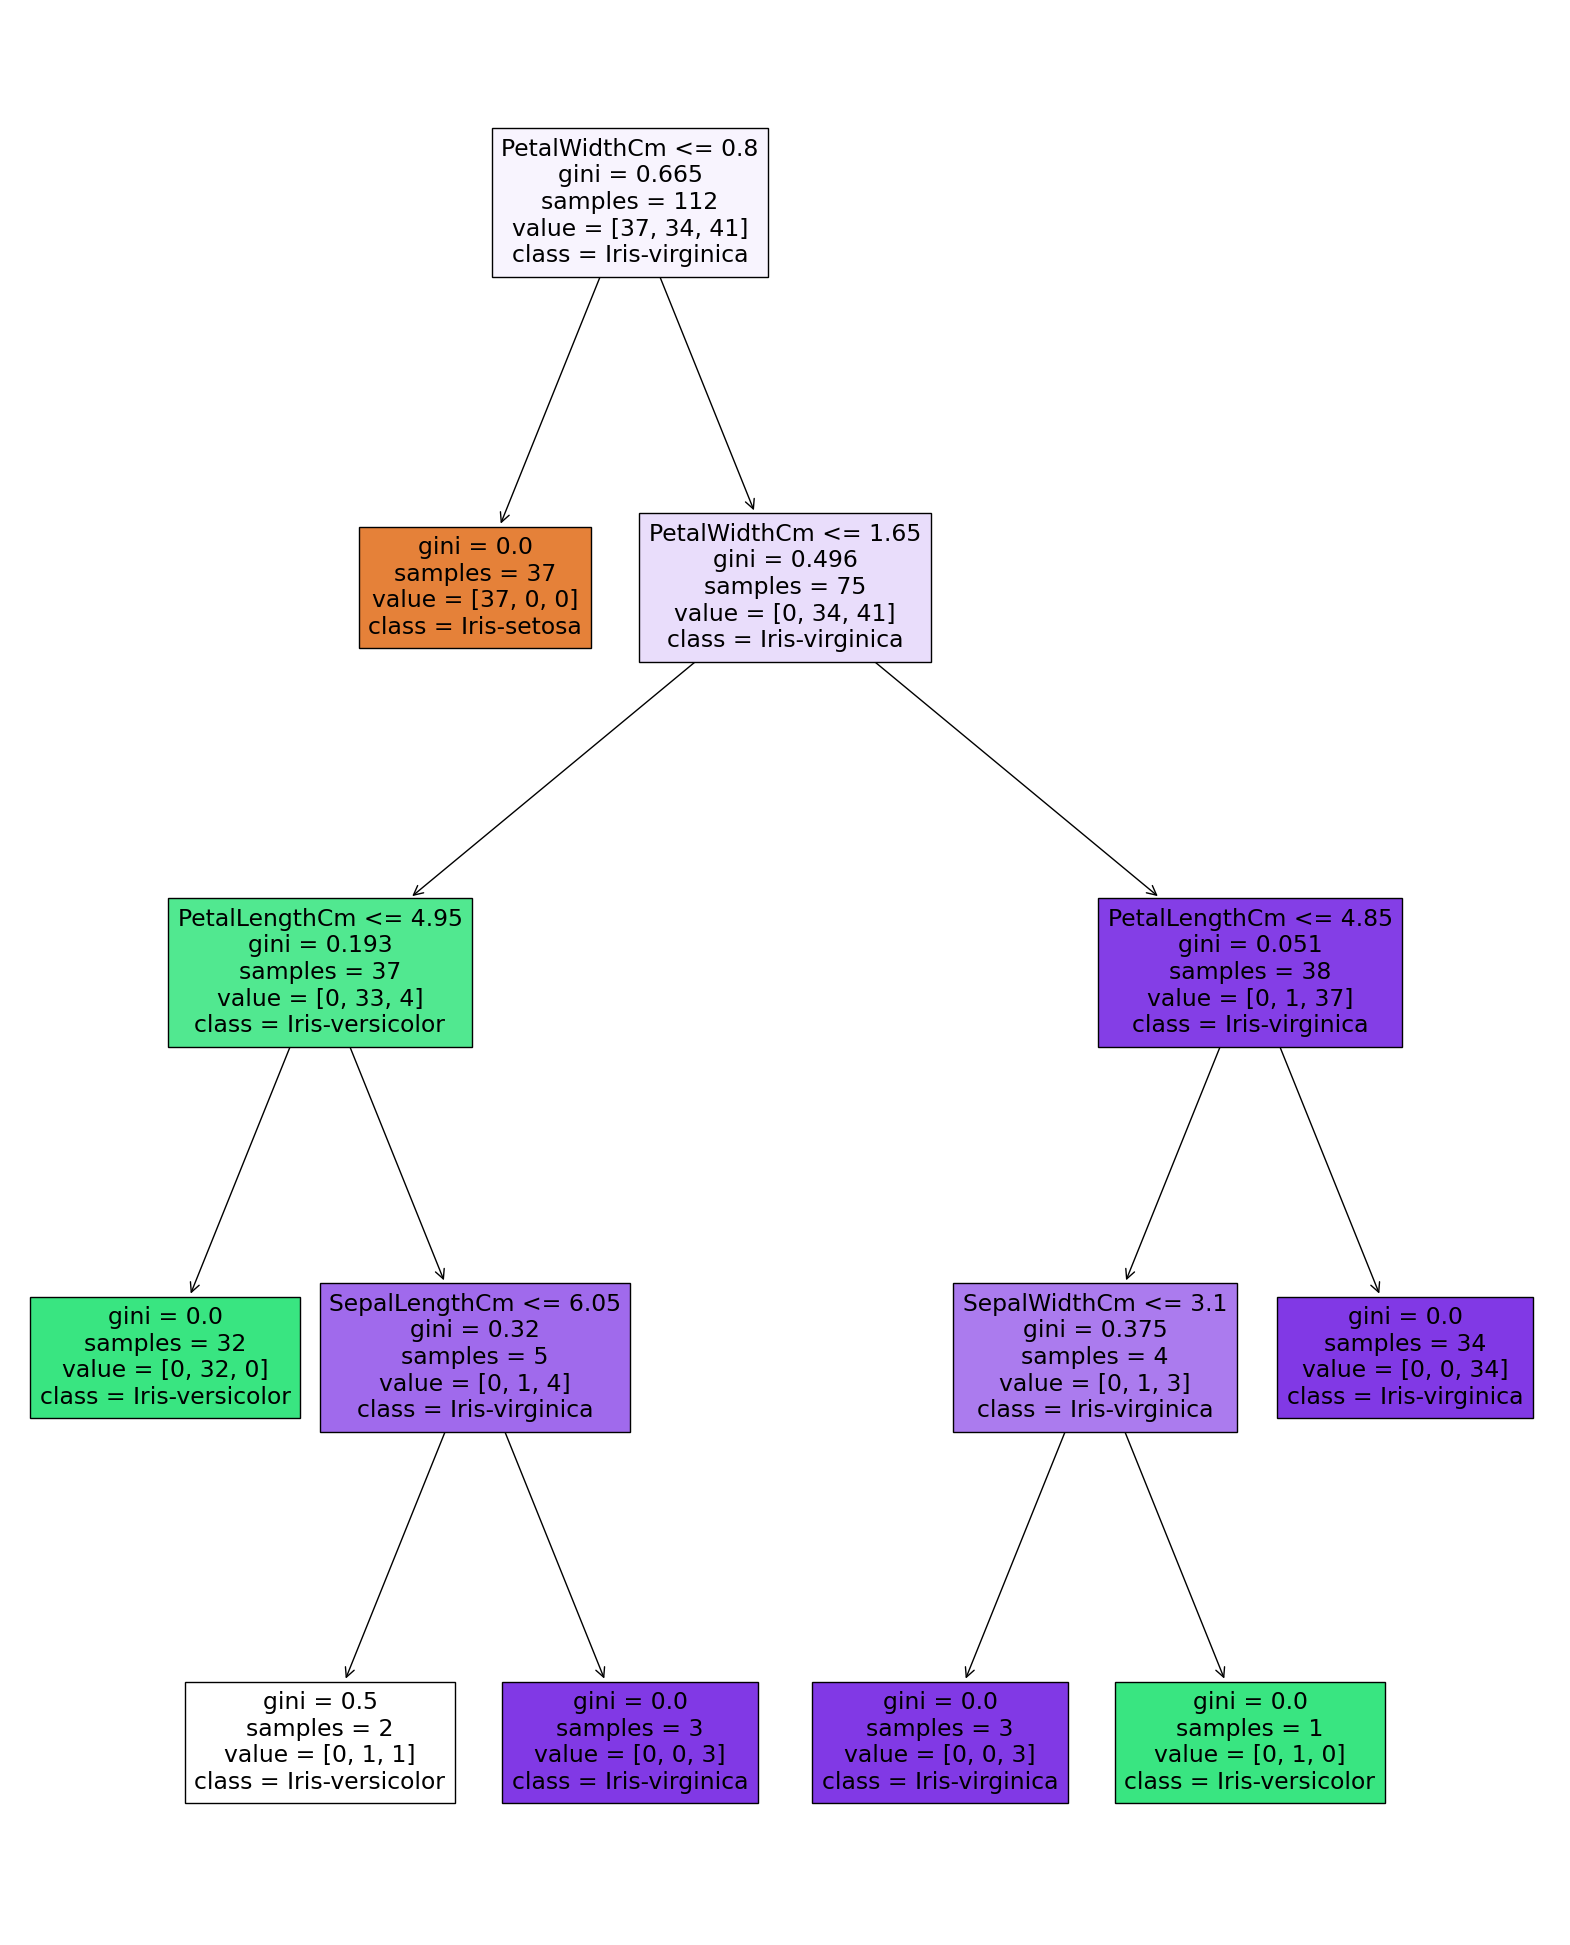

In [40]:
fig=plt.figure(figsize=(20,25))
tree1=plot_tree(dec,feature_names=column,class_names=l,filled=True)

#### Decision Tree using criterion as entropy and max_depth as 4

In [41]:
dec2=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=10)
dec2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [42]:
pr=dec2.predict(x_test)

In [44]:
cm3=confusion_matrix(y_test,pr)

In [45]:
cm3

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

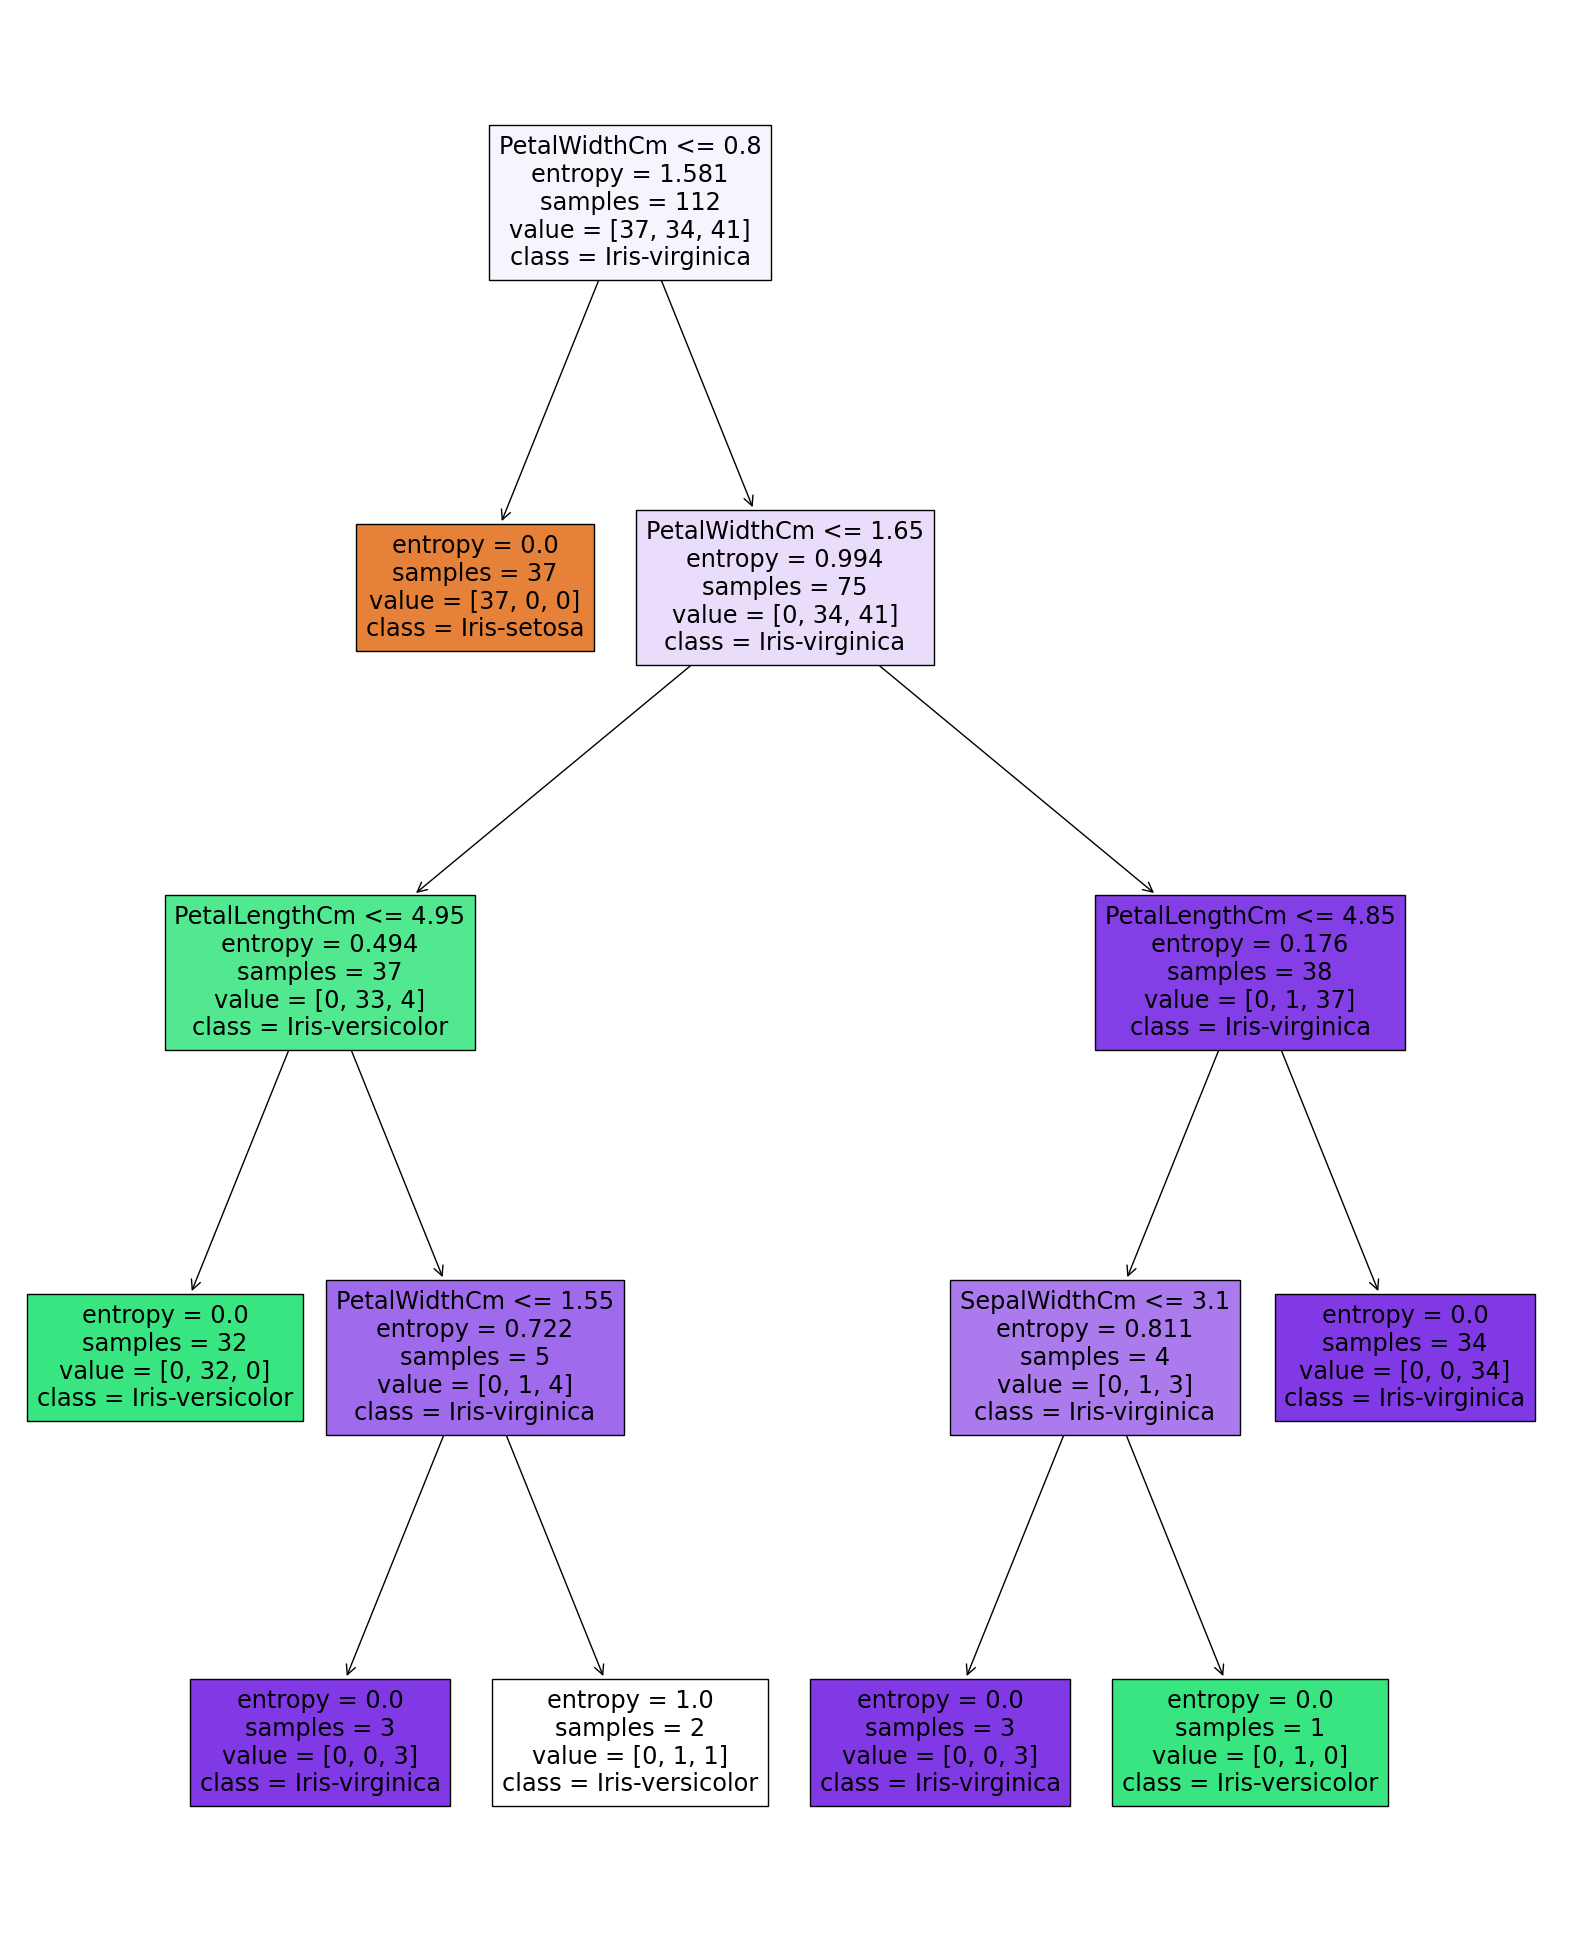

In [47]:
fig=plt.figure(figsize=(20,25))
tree3=plot_tree(dec2,feature_names=column,class_names=l,filled=True)

#### ***`We observe that Decision Tree changes in the deepest leaf nodes while changing the criteria of selection of the nodes from gini to entropy.`***


---



